In [2]:
!pip install geopandas

     |████████████████████████████████| 1.0 MB 7.7 MB/s 
     |████████████████████████████████| 6.3 MB 36.1 MB/s 
     |████████████████████████████████| 16.7 MB 352 kB/s 


In [3]:
!apt install python3-rtree

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following packages were automatically installed and are no longer required:
  libnvidia-common-460 nsight-compute-2020.2.0
Use 'apt autoremove' to remove them.
The following additional packages will be installed:
  libspatialindex-c4v5 libspatialindex-dev libspatialindex4v5
  python3-pkg-resources
Suggested packages:
  python3-setuptools
The following NEW packages will be installed:
  libspatialindex-c4v5 libspatialindex-dev libspatialindex4v5
  python3-pkg-resources python3-rtree
0 upgraded, 5 newly installed, 0 to remove and 42 not upgraded.
Need to get 671 kB of archives.
After this operation, 3,948 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libspatialindex4v5 amd64 1.8.5-5 [219 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libspatialindex-c4v5 amd64 1.8.5-5 [51.7 kB]
Get:3 http://archive.ubuntu.com/ubuntu 

In [4]:
!pip install pysal

     |████████████████████████████████| 46 kB 2.6 MB/s 
     |████████████████████████████████| 2.4 MB 14.1 MB/s 
     |████████████████████████████████| 60 kB 5.6 MB/s 
     |████████████████████████████████| 55 kB 3.2 MB/s 
     |████████████████████████████████| 41 kB 566 kB/s 
     |████████████████████████████████| 95 kB 2.0 MB/s 
     |████████████████████████████████| 5.7 MB 37.8 MB/s 
     |████████████████████████████████| 147 kB 44.3 MB/s 
     |████████████████████████████████| 243 kB 42.8 MB/s 
     |████████████████████████████████| 209 kB 47.2 MB/s 
     |████████████████████████████████| 83 kB 1.7 MB/s 
     |████████████████████████████████| 179 kB 41.4 MB/s 
     |████████████████████████████████| 2.1 MB 33.6 MB/s 
     |████████████████████████████████| 66.7 MB 6.2 MB/s 
     |████████████████████████████████| 183 kB 41.4 MB/s 
     |████████████████████████████████| 78 kB 1.8 MB/s 
     |████████████████████████████████| 14.2 MB 38.0 MB/s 
     |█████████████████████

In [5]:
import geopandas as gpd
import pandas as pd

obesity_shape = gpd.read_file('Obesity_in_Adults_-_CDPHE_Community_Level_Estimates_(Census_Tracts).shp')
atlas = pd.read_csv('food_access_research_atlas.csv')
race = pd.read_csv('ACS_2019_race.csv')
mobility = pd.read_csv('ACS_2019_mobility.csv')
education = pd.read_csv('ACS_2019_education.csv')
poverty = pd.read_csv('ACS_2019_poverty.csv')
age_sex = pd.read_csv('ACS_2019_age_sex.csv')
pop = pd.read_csv('ACS_2019_population.csv')


/usr/local/lib/python3.7/dist-packages/geopandas/_compat.py:115: UserWarning: The Shapely GEOS version (3.10.2-CAPI-1.16.0) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


In [6]:
# S0101_C01_032E - median age
# S0101_C01_033E - sex ratio (males per 100 females)

# population df
pop.rename(columns={'B01003_001E': 'population'}, inplace=True)

pop = pop[['GEO_ID', 'NAME', 'population']]

# mobility df

mobility.rename(columns={'B07003_004E': 'unmoved'}, inplace=True)

mobility = mobility[['GEO_ID', 'unmoved']]

# poverty df
poverty.rename(columns={'B17001_002E': 'poverty'}, inplace=True)

poverty = poverty[['GEO_ID', 'poverty']]

# race df
race.rename(columns={'B03002_003E': 'white'}, inplace=True)

race = race[['GEO_ID', 'white']]

# education df
hs_list = ['B15003_017E', 'B15003_018E', 'B15003_019E', 'B15003_020E', 'B15003_021E', 'B15003_022E', 'B15003_023E', 'B15003_024E', 'B15003_025E']
bach_list = ['B15003_022E', 'B15003_023E', 'B15003_024E', 'B15003_025E']

education['hs education'] = education[hs_list].sum(axis=1)
education['bachelors degree'] = education[bach_list].sum(axis=1)

educ = education[['GEO_ID', 'hs education', 'bachelors degree']]

# age & sex df
age_sex.rename(columns={'S0101_C01_032E': 'median age', 'S0101_C01_033E' : 'sex ratio'}, inplace=True)

age_sex = age_sex[['GEO_ID', 'median age', 'sex ratio']]

# joining all data
pop2 = pop.merge(mobility, on='GEO_ID')

pop3 = pop2.merge(poverty, on='GEO_ID')

pop4 = pop3.merge(race, on='GEO_ID')

pop5 = pop4.merge(educ, on='GEO_ID')

acs_pop = pop5.merge(age_sex, on='GEO_ID')

acs_pop['unmoved percent'] = (acs_pop['unmoved'] / acs_pop['population'])
acs_pop['poverty percent'] = (acs_pop['poverty'] / acs_pop['population'])
acs_pop['minority percent'] = 1 - (acs_pop['white'] / acs_pop['population'])
acs_pop['hs education percent'] = (acs_pop['hs education'] / acs_pop['population'])
acs_pop['bachelors degree percent'] = (acs_pop['bachelors degree'] / acs_pop['population'])

acs_pop['GEO_ID'] = acs_pop['GEO_ID'].str.slice(9, 20)

acs_pop.head()

,GEO_ID,NAME,population,unmoved,poverty,white,hs education,bachelors degree,median age,sex ratio,unmoved percent,poverty percent,minority percent,hs education percent,bachelors degree percent
0,08001007801,"Census Tract 78.01, Adams County, Colorado",4215,3086,1174,749,1383,149,28.8,109.4,0.732147,0.278529,0.822301,0.328114,0.035350
1,08001007802,"Census Tract 78.02, Adams County, Colorado",4389,3539,1285,636,1762,192,33.7,99.8,0.806334,0.292777,0.855092,0.401458,0.043746
2,08001007900,"Census Tract 79, Adams County, Colorado",5627,4754,706,1338,2380,530,30.3,106.8,0.844855,0.125467,0.762218,0.422961,0.094189
3,08001008000,"Census Tract 80, Adams County, Colorado",5818,5200,1131,1409,2537,405,30.4,101.3,0.893778,0.194397,0.757821,0.436061,0.069612
4,08001008100,"Census Tract 81, Adams County, Colorado",1574,1016,395,876,1022,681,29.5,86.7,0.645489,0.250953,0.443456,0.649301,0.432656


In [7]:
atlas = atlas[atlas['State'] == 'Colorado']
atlas = atlas[['CensusTract', 'LA1and10', 'LAPOP1_10', 'POP2010']]
atlas['CensusTract'] = '0' + atlas[['CensusTract']].astype('str')

acs_pop_w_deserts = pd.merge(acs_pop, atlas, left_on='GEO_ID', right_on='CensusTract')
acs_pop_w_deserts['food desert percent'] = (acs_pop_w_deserts['LAPOP1_10'] / acs_pop_w_deserts['POP2010'])
acs_pop_w_deserts.drop(['CensusTract', 'POP2010'], axis=1, inplace=True)

acs_pop_w_deserts

,GEO_ID,NAME,population,unmoved,poverty,white,hs education,bachelors degree,median age,sex ratio,unmoved percent,poverty percent,minority percent,hs education percent,bachelors degree percent,LA1and10,LAPOP1_10,food desert percent
0,08001007801,"Census Tract 78.01, Adams County, Colorado",4215,3086,1174,749,1383,149,28.8,109.4,0.732147,0.278529,0.822301,0.328114,0.035350,0,0.000000,0.000000
1,08001007802,"Census Tract 78.02, Adams County, Colorado",4389,3539,1285,636,1762,192,33.7,99.8,0.806334,0.292777,0.855092,0.401458,0.043746,0,0.000000,0.000000
2,08001007900,"Census Tract 79, Adams County, Colorado",5627,4754,706,1338,2380,530,30.3,106.8,0.844855,0.125467,0.762218,0.422961,0.094189,1,837.787136,0.150817
3,08001008000,"Census Tract 80, Adams County, Colorado",5818,5200,1131,1409,2537,405,30.4,101.3,0.893778,0.194397,0.757821,0.436061,0.069612,0,0.000000,0.000000
4,08001008100,"Census Tract 81, Adams County, Colorado",1574,1016,395,876,1022,681,29.5,86.7,0.645489,0.250953,0.443456,0.649301,0.432656,1,395.892747,0.463575
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1244,08123002300,"Census Tract 23, Weld County, Colorado",5586,4711,494,3995,3110,770,38.2,102.5,0.843358,0.088435,0.284819,0.556749,0.137845,0,2.527746,0.000547
1245,08123002501,"Census Tract 25.01, Weld County, Colorado",5535,4950,405,4750,3518,1000,41.2,101.3,0.894309,0.073171,0.141825,0.635592,0.180668,1,3371.183741,0.696094
1246,08123002502,"Census Tract 25.02, Weld County, Colorado",7732,6493,1201,5730,4618,822,36.6,107.7,0.839757,0.155329,0.258924,0.597258,0.106311,1,511.268937,0.090394
1247,08125963100,"Census Tract 9631, Yuma County, Colorado",4422,3756,631,3535,2592,782,40.4,99.1,0.849389,0.142696,0.200588,0.586160,0.176843,1,1114.139004,0.242099


In [8]:
CO = pd.merge(obesity_shape, acs_pop_w_deserts, left_on='Census_Tra', right_on='GEO_ID')

CO['Obese_Cens'] = (CO['Obese_Cens'] / 100)

In [9]:
CO

,OBJECTID,Census_Tra,Census_T_1,County_Nam,Adult_Popu,Health_Sta,Obese_Cens,Obese_Esti,Obese_Map_,Obese_Coun,...,median age,sex ratio,unmoved percent,poverty percent,minority percent,hs education percent,bachelors degree percent,LA1and10,LAPOP1_10,food desert percent
0,1,08043979000,"Census Tract 9790, Fremont County, Colorado",Fremont,2994,13,0.262,95% C.I.: 24.8 - 27.6,Highest Quintile,County/Regional Estimate 24% (95% C.I.: 19.7 -...,...,58.5,100.3,0.909433,0.138889,0.107928,0.758681,0.210359,1,2938.445361,0.848771
1,2,08045951600,"Census Tract 9516, Garfield County, Colorado",Garfield,2800,12,0.224,95% C.I.: 21.1 - 23.9,Fourth Quintile,County/Regional Estimate 21.7% (95% C.I.: 17.3...,...,37.8,79.2,0.885181,0.170257,0.393852,0.624803,0.306884,0,64.475644,0.016482
2,3,08069002803,"Census Tract 28.03, Larimer County, Colorado",Larimer,97,2,0.138,95% C.I.: 13.4 - 14.3,Lowest Quintile,County/Regional Estimate 19% (95% C.I.: 17.2 -...,...,30.8,60.6,0.849057,0.377358,0.056604,0.849057,0.415094,0,1.819867,0.019781
3,4,08125963200,"Census Tract 9632, Yuma County, Colorado",Yuma,4381,1,0.206,95% C.I.: 18.1 - 24.1,Lowest Quintile,County/Regional Estimate 22.8% (95% C.I.: 16.3...,...,35.6,99,0.831213,0.130084,0.294392,0.590396,0.118975,1,1186.408978,0.218050
4,5,08069002401,"Census Tract 24.01, Larimer County, Colorado",Larimer,1190,2,0.209,95% C.I.: 20.3 - 21.6,Highest Quintile,County/Regional Estimate 19% (95% C.I.: 17.2 -...,...,62.6,112.2,0.883136,0.047337,0.060651,0.931213,0.388314,1,1216.999988,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1244,1245,08005081000,"Census Tract 810, Arapahoe County, Colorado",Arapahoe,3983,15,0.241,95% C.I.: 23.4 - 24.8,Highest Quintile,County/Regional Estimate 22% (95% C.I.: 20.2 -...,...,30.9,90,0.701794,0.221564,0.711026,0.467340,0.140568,0,0.000000,0.000000
1245,1246,08005080300,"Census Tract 803, Arapahoe County, Colorado",Arapahoe,4605,15,0.235,95% C.I.: 22.8 - 24.2,Highest Quintile,County/Regional Estimate 22% (95% C.I.: 20.2 -...,...,40.2,111.9,0.806079,0.090651,0.390686,0.679524,0.345005,0,0.000000,0.000000
1246,1247,08005080400,"Census Tract 804, Arapahoe County, Colorado",Arapahoe,4128,15,0.221,95% C.I.: 21.6 - 22.6,Middle Quintile,County/Regional Estimate 22% (95% C.I.: 20.2 -...,...,40.6,101.5,0.870198,0.058431,0.377477,0.693894,0.320057,0,0.000000,0.000000
1247,1248,08005080800,"Census Tract 808, Arapahoe County, Colorado",Arapahoe,2196,15,0.246,95% C.I.: 23.9 - 25.3,Highest Quintile,County/Regional Estimate 22% (95% C.I.: 20.2 -...,...,27.1,117,0.725061,0.094079,0.754799,0.370911,0.099757,0,0.000000,0.000000


In [10]:
CO.columns

Index(['OBJECTID', 'Census_Tra', 'Census_T_1', 'County_Nam', 'Adult_Popu',
       'Health_Sta', 'Obese_Cens', 'Obese_Esti', 'Obese_Map_', 'Obese_Coun',
       'Obese_Ma_1', 'Obese_Stat', 'geometry', 'GEO_ID', 'NAME', 'population',
       'unmoved', 'poverty', 'white', 'hs education', 'bachelors degree',
       'median age', 'sex ratio', 'unmoved percent', 'poverty percent',
       'minority percent', 'hs education percent', 'bachelors degree percent',
       'LA1and10', 'LAPOP1_10', 'food desert percent'],
      dtype='object')

In [11]:
CO_trim = CO[['GEO_ID', 'Obese_Cens', 'population', 'median age', 'sex ratio', 'unmoved percent', 'poverty percent', 'minority percent', 'bachelors degree percent', 'LA1and10', 'food desert percent', 'geometry']]

CO_trim.columns

col_list = ['census tract', 'obesity percent', 'population', 'median age', 'sex ratio', 'unmoved percent', 'poverty percent', 'minority percent', 'bachelors degree percent', 'food desert exists', 'food desert percent', 'geometry']

CO_trim.columns = col_list

CO_trim.columns

Index(['census tract', 'obesity percent', 'population', 'median age',
       'sex ratio', 'unmoved percent', 'poverty percent', 'minority percent',
       'bachelors degree percent', 'food desert exists', 'food desert percent',
       'geometry'],
      dtype='object')

In [12]:
CO_trim.head()

,census tract,obesity percent,population,median age,sex ratio,unmoved percent,poverty percent,minority percent,bachelors degree percent,food desert exists,food desert percent,geometry
0,08043979000,0.262,3456,58.5,100.3,0.909433,0.138889,0.107928,0.210359,1,0.848771,"POLYGON ((-105.88354 38.32817, -105.88386 38.3..."
1,08045951600,0.224,3806,37.8,79.2,0.885181,0.170257,0.393852,0.306884,0,0.016482,"POLYGON ((-107.43228 39.57174, -107.43310 39.5..."
2,08069002803,0.138,53,30.8,60.6,0.849057,0.377358,0.056604,0.415094,0,0.019781,"POLYGON ((-105.57907 40.33210, -105.57911 40.3..."
3,08125963200,0.206,5581,35.6,99,0.831213,0.130084,0.294392,0.118975,1,0.218050,"POLYGON ((-102.80356 39.99326, -102.80360 39.9..."
4,08069002401,0.209,1352,62.6,112.2,0.883136,0.047337,0.060651,0.388314,1,1.000000,"POLYGON ((-105.22074 40.79379, -105.22118 40.7..."


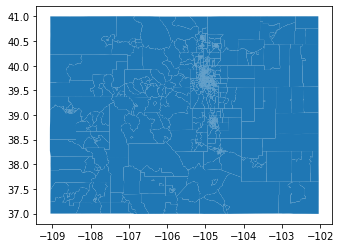

In [13]:
import matplotlib.pyplot as plt

CO_trim.plot()

In [14]:
import pysal
import mapclassify
import libpysal

# 7 census tracts with no population. removing them
CO_2 = CO_trim[CO_trim['population'] != 0]

# 2 census tracts with no obesity values, removing them too
CO_2[pd.isna(CO_2['obesity percent'])]

CO_3 = CO_2[~pd.isna(CO_2['obesity percent'])]

CO_3

# census tract 08043980100 has no sex ratio; i'm just going to remove this one last tract from the dataset

CO_3 = CO_3[CO_3['census tract'] != '08043980100']

w = libpysal.weights.Queen.from_dataframe(CO_3)
w

In [15]:
CO_3

,census tract,obesity percent,population,median age,sex ratio,unmoved percent,poverty percent,minority percent,bachelors degree percent,food desert exists,food desert percent,geometry
0,08043979000,0.262,3456,58.5,100.3,0.909433,0.138889,0.107928,0.210359,1,0.848771,"POLYGON ((-105.88354 38.32817, -105.88386 38.3..."
1,08045951600,0.224,3806,37.8,79.2,0.885181,0.170257,0.393852,0.306884,0,0.016482,"POLYGON ((-107.43228 39.57174, -107.43310 39.5..."
2,08069002803,0.138,53,30.8,60.6,0.849057,0.377358,0.056604,0.415094,0,0.019781,"POLYGON ((-105.57907 40.33210, -105.57911 40.3..."
3,08125963200,0.206,5581,35.6,99,0.831213,0.130084,0.294392,0.118975,1,0.218050,"POLYGON ((-102.80356 39.99326, -102.80360 39.9..."
4,08069002401,0.209,1352,62.6,112.2,0.883136,0.047337,0.060651,0.388314,1,1.000000,"POLYGON ((-105.22074 40.79379, -105.22118 40.7..."
...,...,...,...,...,...,...,...,...,...,...,...,...
1244,08005081000,0.241,5741,30.9,90,0.701794,0.221564,0.711026,0.140568,0,0.000000,"POLYGON ((-104.82688 39.71731, -104.82688 39.7..."
1245,08005080300,0.235,5626,40.2,111.9,0.806079,0.090651,0.390686,0.345005,0,0.000000,"POLYGON ((-104.86016 39.68205, -104.85899 39.6..."
1246,08005080400,0.221,4946,40.6,101.5,0.870198,0.058431,0.377477,0.320057,0,0.000000,"POLYGON ((-104.84360 39.65845, -104.84379 39.6..."
1247,08005080800,0.246,3699,27.1,117,0.725061,0.094079,0.754799,0.099757,0,0.000000,"POLYGON ((-104.82996 39.69663, -104.83048 39.6..."


In [16]:
CO_3['median age'] = CO_3[['median age']].astype('float')
CO_3['sex ratio'] = CO_3[['sex ratio']].astype('float')

In [50]:
CO_3[['median age', 'sex ratio', 'unmoved percent', 'poverty percent', 'minority percent', 'bachelors degree percent', 'food desert percent']].describe()

,median age,sex ratio,unmoved percent,poverty percent,minority percent,bachelors degree percent,food desert percent
count,1239.000,1239.000,1239.000,1239.000,1239.000,1239.000,1239.000
mean,38.665,106.973,0.813,0.107,0.310,0.280,0.229
std,7.470,141.721,0.098,0.084,0.200,0.148,0.321
min,14.600,49.800,0.155,0.000,0.026,0.000,0.000
25%,33.550,92.200,0.769,0.047,0.157,0.159,0.000
50%,37.800,100.400,0.836,0.084,0.253,0.267,0.047
75%,43.300,109.100,0.879,0.139,0.417,0.384,0.375
max,75.300,4987.200,0.996,0.768,0.934,0.751,1.000


In [49]:
CO_3[['median age', 'sex ratio', 'unmoved percent', 'poverty percent', 'minority percent', 'bachelors degree percent', 'food desert percent']].corr()

,median age,sex ratio,unmoved percent,poverty percent,minority percent,bachelors degree percent,food desert percent
median age,1.000,-0.027,0.539,-0.369,-0.526,0.365,0.093
sex ratio,-0.027,1.000,0.024,-0.036,0.042,-0.078,0.074
unmoved percent,0.539,0.024,1.000,-0.305,-0.107,0.029,0.093
poverty percent,-0.369,-0.036,-0.305,1.000,0.472,-0.443,-0.074
minority percent,-0.526,0.042,-0.107,0.472,1.000,-0.623,-0.032
bachelors degree percent,0.365,-0.078,0.029,-0.443,-0.623,1.000,-0.084
food desert percent,0.093,0.074,0.093,-0.074,-0.032,-0.084,1.000


In [51]:
with open('base_stats.tex', 'w') as tf:
  tf.write(CO_3[['median age', 'sex ratio', 'unmoved percent', 'poverty percent', 'minority percent', 'bachelors degree percent', 'food desert percent']].describe().to_latex())

with open('base_corr.tex', 'w') as tf:
  tf.write(CO_3[['median age', 'sex ratio', 'unmoved percent', 'poverty percent', 'minority percent', 'bachelors degree percent', 'food desert percent']].corr().to_latex())

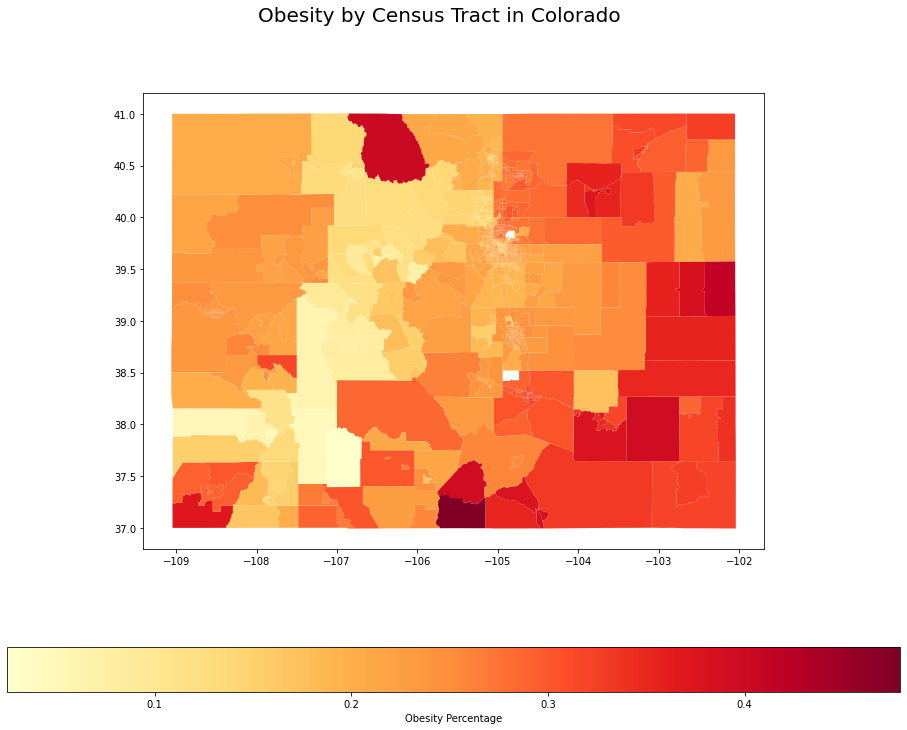

In [17]:
fig, ax = plt.subplots(1,1)

CO_3.plot(column='obesity percent', ax=ax, cmap='YlOrRd', legend=True, legend_kwds={'label': 'Obesity Percentage', 'orientation': 'horizontal'})
fig.set_size_inches(16, 12)
fig.suptitle('Obesity by Census Tract in Colorado', fontsize=20)
plt.show()

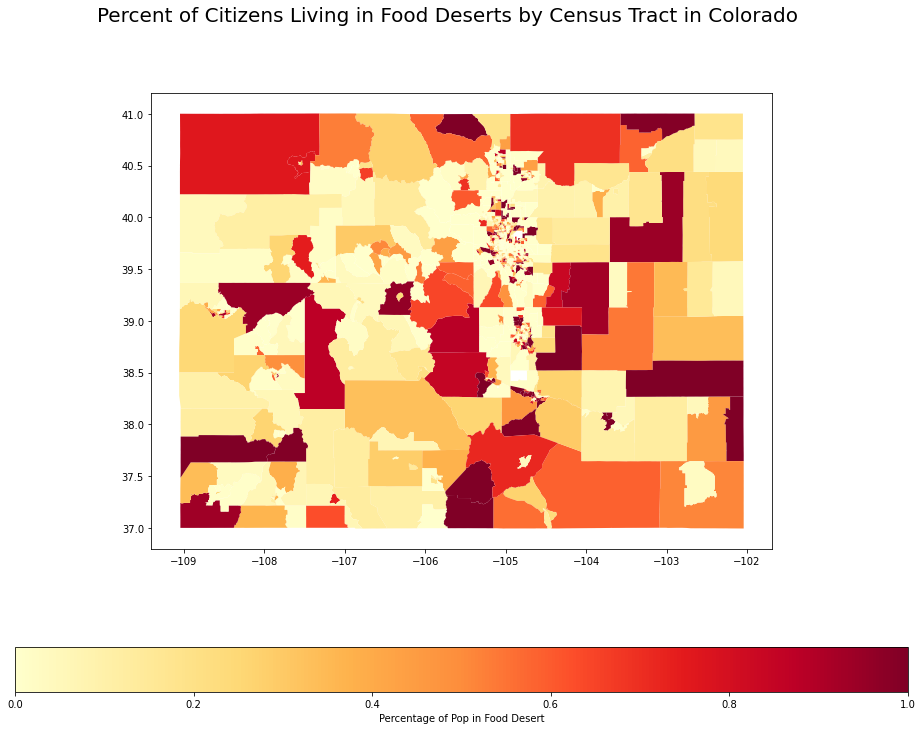

In [28]:
fig, ax = plt.subplots(1,1)

CO_3.plot(column='food desert percent', cmap="YlOrRd", ax=ax, legend=True, legend_kwds={'label': 'Percentage of Pop in Food Desert', 'orientation': 'horizontal'})
fig.set_size_inches(16, 12)
fig.suptitle('Percent of Citizens Living in Food Deserts by Census Tract in Colorado', fontsize=20)
plt.show()

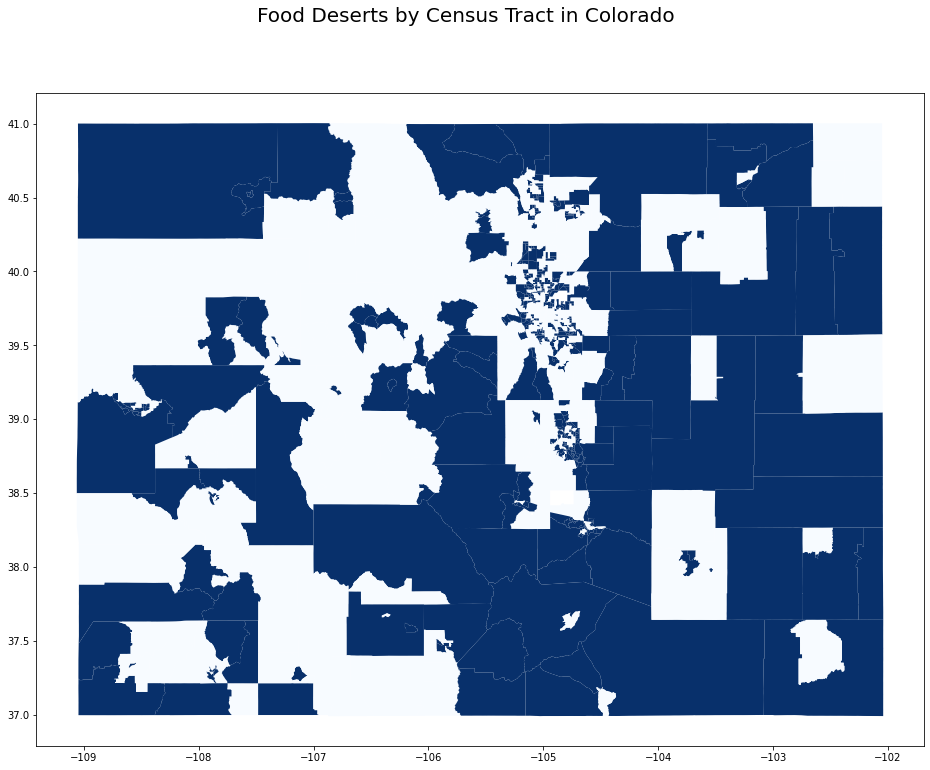

In [18]:
fig, ax = plt.subplots(1,1)

CO_3.plot(column='food desert exists', cmap="Blues", ax=ax)
fig.set_size_inches(16, 12)
fig.suptitle('Food Deserts by Census Tract in Colorado', fontsize=20)
plt.show()

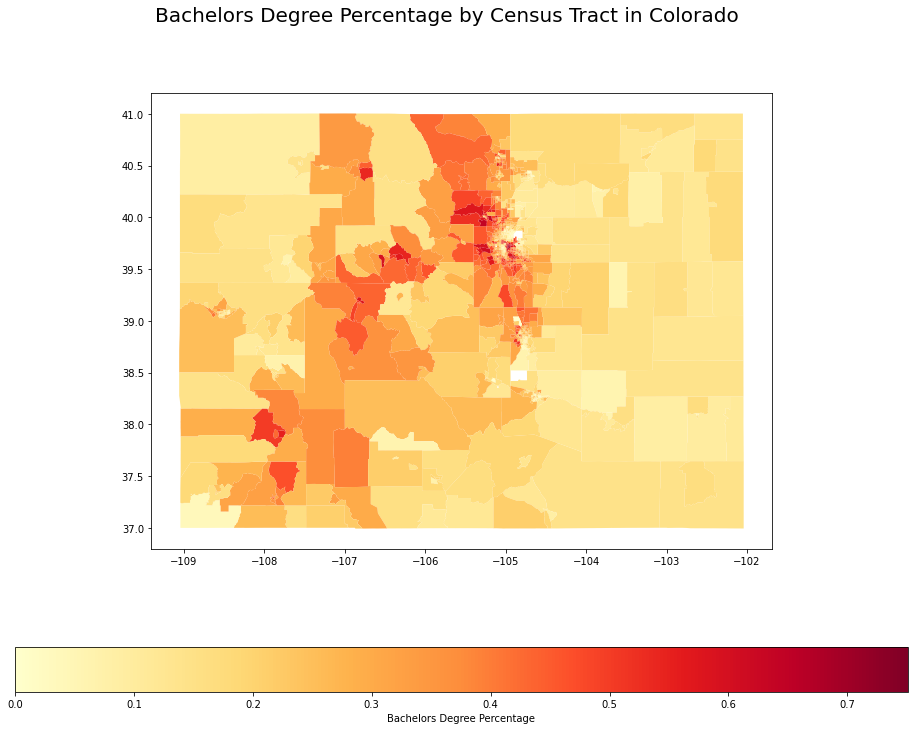

In [24]:
fig, ax = plt.subplots(1,1)

CO_3.plot(column='bachelors degree percent', ax=ax, cmap='YlOrRd', legend=True, legend_kwds={'label': 'Bachelors Degree Percentage', 'orientation': 'horizontal'})
fig.set_size_inches(16, 12)
fig.suptitle('Bachelors Degree Percentage by Census Tract in Colorado', fontsize=20)
plt.show()

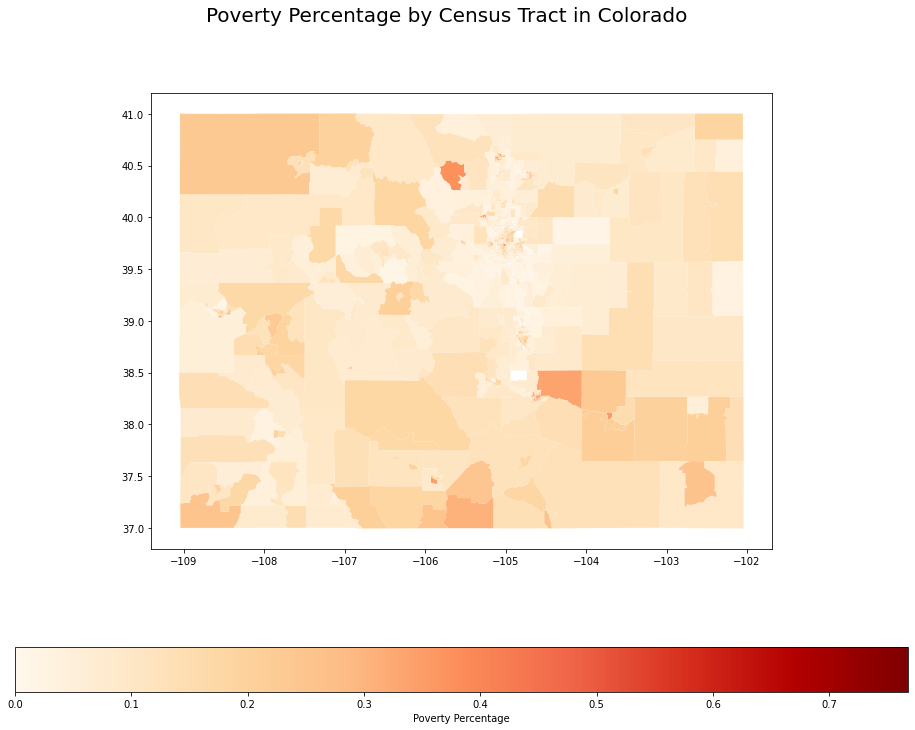

In [19]:
fig, ax = plt.subplots(1,1)

CO_3.plot(column='poverty percent', ax=ax, cmap='OrRd', legend=True, legend_kwds={'label': 'Poverty Percentage', 'orientation': 'horizontal'})
fig.set_size_inches(16, 12)
fig.suptitle('Poverty Percentage by Census Tract in Colorado', fontsize=20)
plt.show()

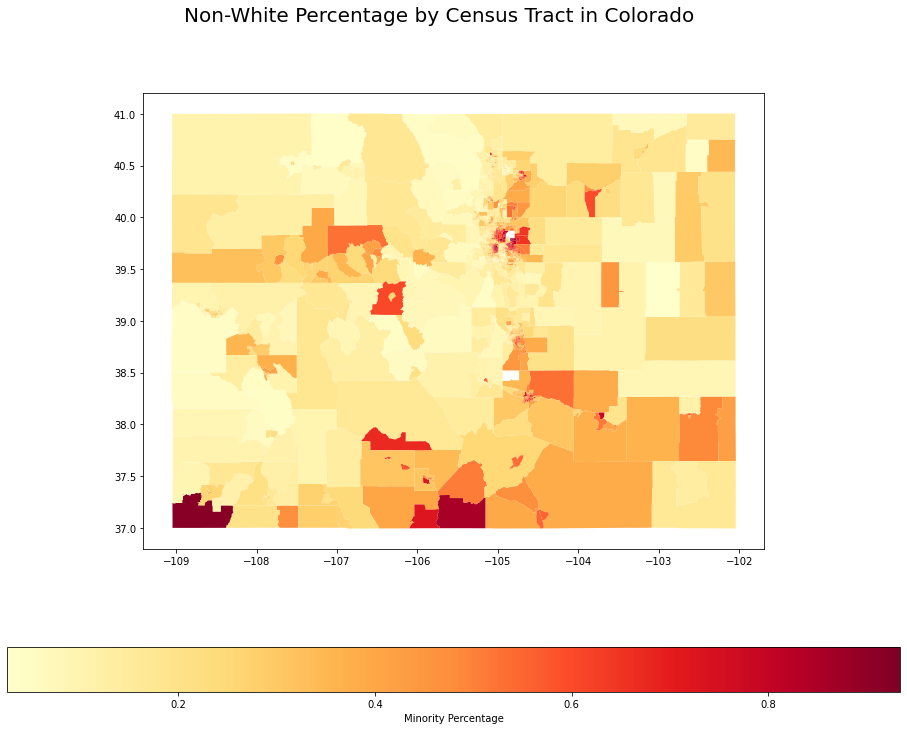

In [20]:
fig, ax = plt.subplots(1,1)

CO_3.plot(column='minority percent', ax=ax, cmap='YlOrRd', legend=True, legend_kwds={'label': 'Minority Percentage', 'orientation': 'horizontal'})
fig.set_size_inches(16, 12)
fig.suptitle('Non-White Percentage by Census Tract in Colorado', fontsize=20)
plt.show()

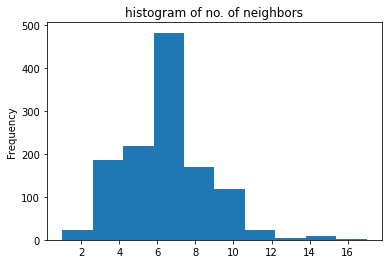

In [131]:
cardinalities = pd.Series(w.cardinalities)
cardinalities.plot(kind='hist', title='histogram of no. of neighbors');

In [29]:
with open('CO.gal', 'w') as fo:
    fo.write('w')

In [30]:
with open('CO.gal', 'r') as fo:
    new_w = fo.read()

In [22]:
from esda.moran import (Moran, Moran_Local, Moran_BV, Moran_Local_BV)

vars_list = ['obesity percent', 'population', 'median age', 'sex ratio', 'unmoved percent', 'poverty percent', 'minority percent', 'bachelors degree percent', 'food desert percent']

def Morans_DF_Build(x):
  l = []
  l.append(x)
  morans_i = Moran((CO_3[x]), w)

  l.append(morans_i.I)
  l.append(morans_i.p_sim)

  return l

Morans_List = []
for item in vars_list:
  Morans_List.append(Morans_DF_Build(item))

df = pd.DataFrame(Morans_List, columns=['Variable Name', 'Morans I', 'Significance'])

df

,Variable Name,Morans I,Significance
0,obesity percent,0.784519,0.001
1,population,0.268399,0.001
2,median age,0.454269,0.001
3,sex ratio,-0.001931,0.424
4,unmoved percent,0.334759,0.001
5,poverty percent,0.461543,0.001
6,minority percent,0.723988,0.001
7,bachelors degree percent,0.703240,0.001
8,food desert percent,0.242715,0.001


In [51]:
df.to_latex()

'\\begin{tabular}{llrr}\n\\toprule\n{} &             Variable Name &  Morans I &  Significance \\\\\n\\midrule\n0 &           obesity\\_percent &  0.784519 &         0.001 \\\\\n1 &                population &  0.268399 &         0.001 \\\\\n2 &                median\\_age &  0.454269 &         0.001 \\\\\n3 &                 sex\\_ratio & -0.001931 &         0.395 \\\\\n4 &           unmoved\\_percent &  0.334759 &         0.001 \\\\\n5 &           poverty\\_percent &  0.461543 &         0.001 \\\\\n6 &          minority\\_percent &  0.723988 &         0.001 \\\\\n7 &      hs\\_education\\_percent &  0.513947 &         0.001 \\\\\n8 &  bachelors\\_degree\\_percent &  0.703240 &         0.001 \\\\\n9 &       food\\_desert\\_percent &  0.242715 &         0.001 \\\\\n\\bottomrule\n\\end{tabular}\n'

In [97]:
with open('morans.tex', 'w') as tf:
  tf.write(df.to_latex())

In [24]:
mi_obesity = Moran(CO_3['obesity percent'], w)

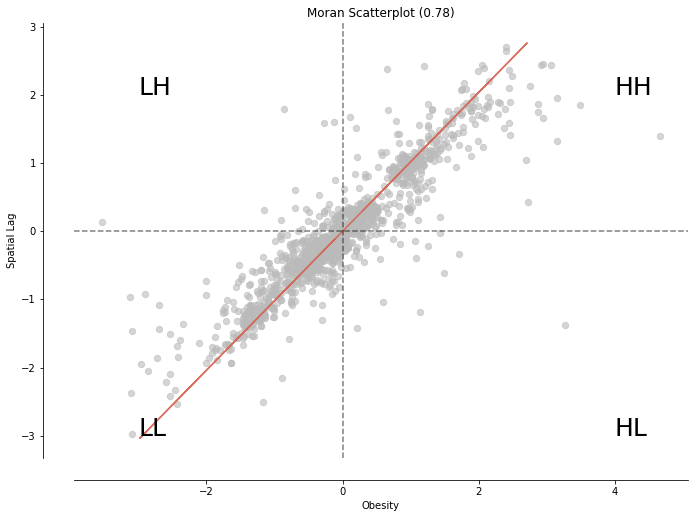

In [25]:
from splot.esda import (moran_scatterplot, lisa_cluster, plot_local_autocorrelation)

fig, ax = moran_scatterplot(mi_obesity)
fig.set_size_inches(12, 8)
ax.set_xlabel('Obesity')
plt.text(4, 2, "HH", fontsize=25)
plt.text(4, -3, "HL", fontsize=25)
plt.text(-3, 2, "LH", fontsize=25)
plt.text(-3, -3, "LL", fontsize=25)
plt.show()

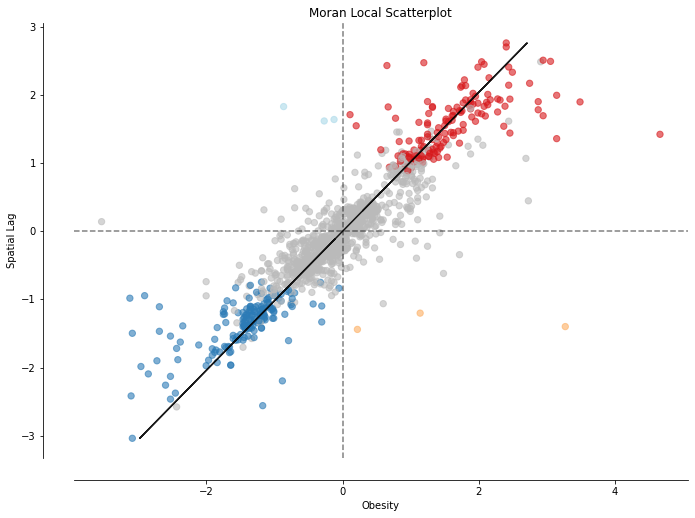

In [26]:
lisa_obs = Moran_Local(CO_3['obesity percent'], w)

fig, ax = moran_scatterplot(lisa_obs, p=.01,);
fig.set_size_inches(12, 8)
ax.set_xlabel('Obesity')
plt.show()

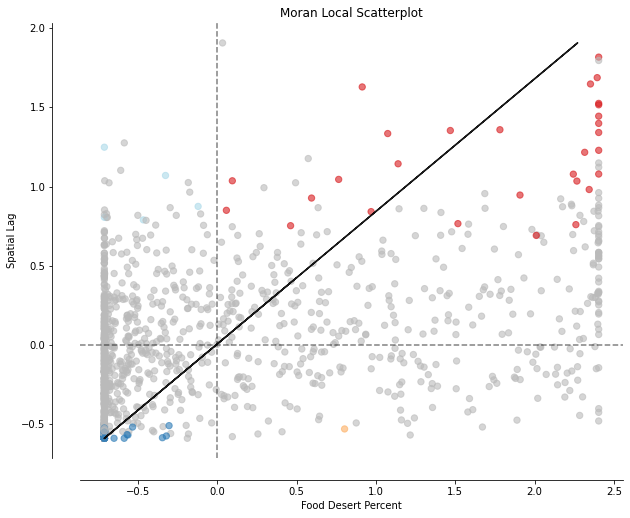

In [27]:
lisa_fd = Moran_Local(CO_3['food desert percent'], w)

fig, ax = moran_scatterplot(lisa_fd, p=.01,);
fig.set_size_inches(12, 8)
ax.set_xlabel('Food Desert Percent')
plt.show()

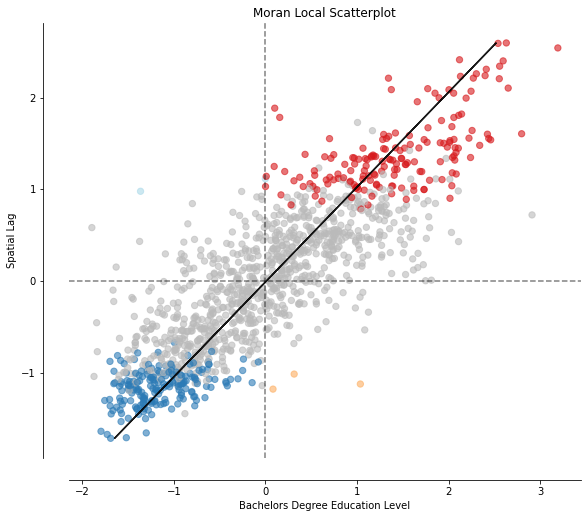

In [28]:
lisa_educ = Moran_Local(CO_3['bachelors degree percent'], w)

#moran_scatterplot(lisa_educ, p=.01);

fig, ax = moran_scatterplot(lisa_educ, p=.01,);
fig.set_size_inches(12, 8)
ax.set_xlabel('Bachelors Degree Education Level')
plt.show()

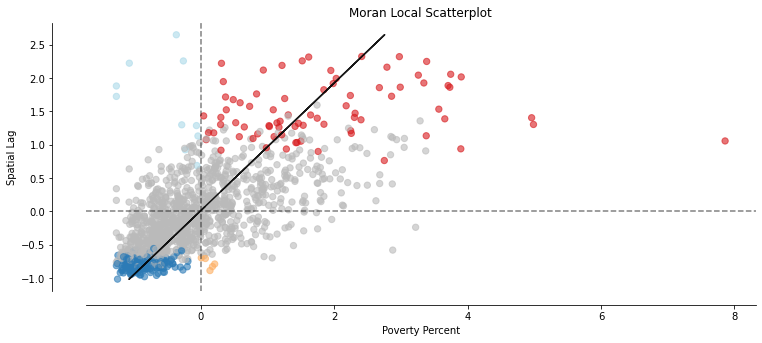

In [29]:
lisa_pov = Moran_Local(CO_3['poverty percent'], w)

fig, ax = moran_scatterplot(lisa_pov, p=.01,);
fig.set_size_inches(12, 8)
ax.set_xlabel('Poverty Percent')
plt.show()

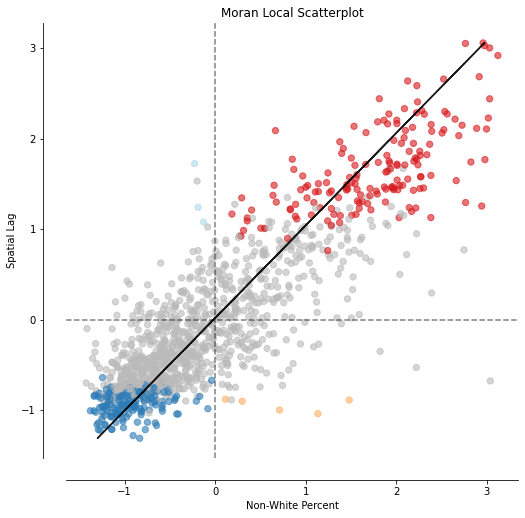

In [30]:
lisa_min = Moran_Local(CO_3['minority percent'], w)

fig, ax = moran_scatterplot(lisa_min, p=.01,);
fig.set_size_inches(12, 8)
ax.set_xlabel('Non-White Percent')
plt.show()

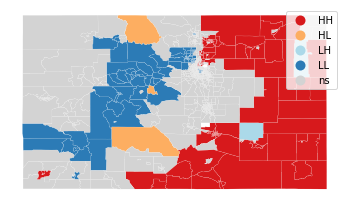

In [153]:
lisa_cluster(lisa_obs, CO_3, p=.01);

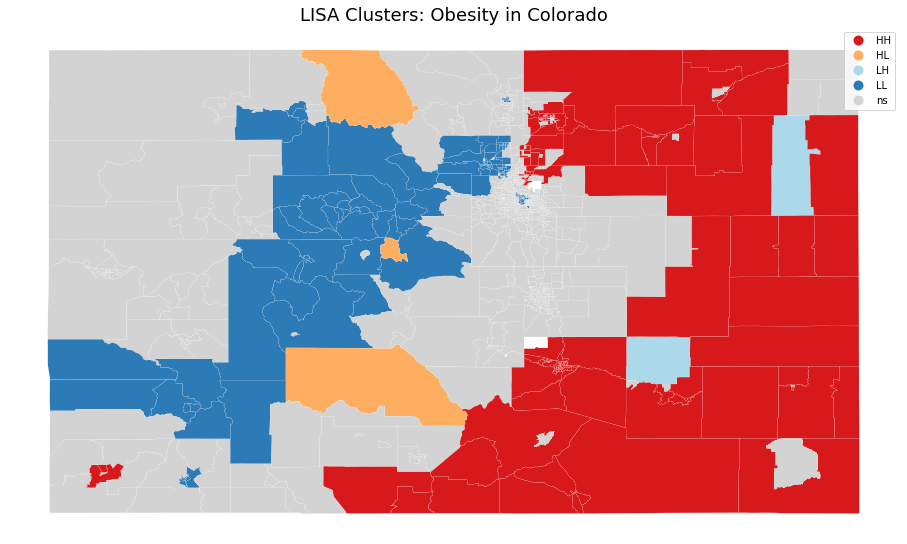

In [31]:
fig, ax = lisa_cluster(lisa_obs, CO_3, p=.01)

ax.set_title("LISA Clusters: Obesity in Colorado", size=18)
fig.set_size_inches(16, 12)
plt.show()

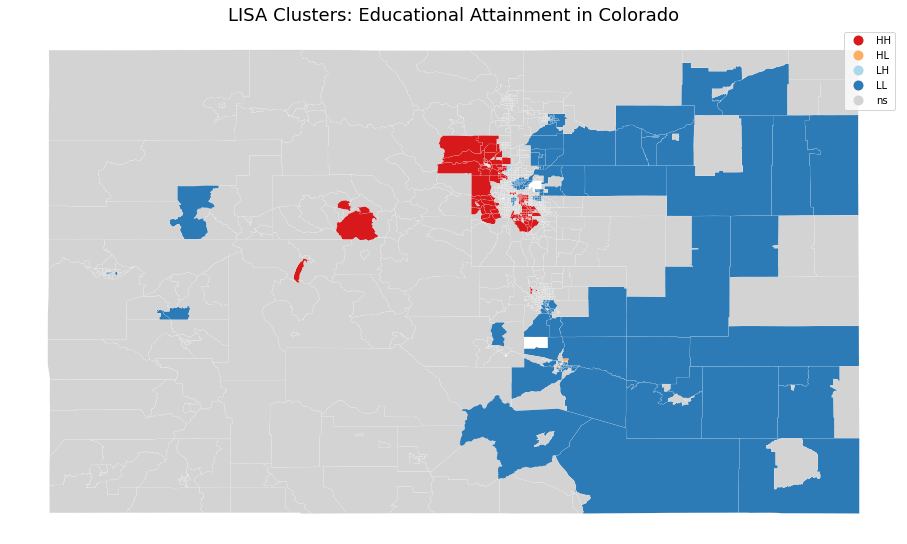

In [32]:
fig, ax = lisa_cluster(lisa_educ, CO_3, p=.01)

ax.set_title("LISA Clusters: Educational Attainment in Colorado", size=18)
fig.set_size_inches(16, 12)
plt.show()

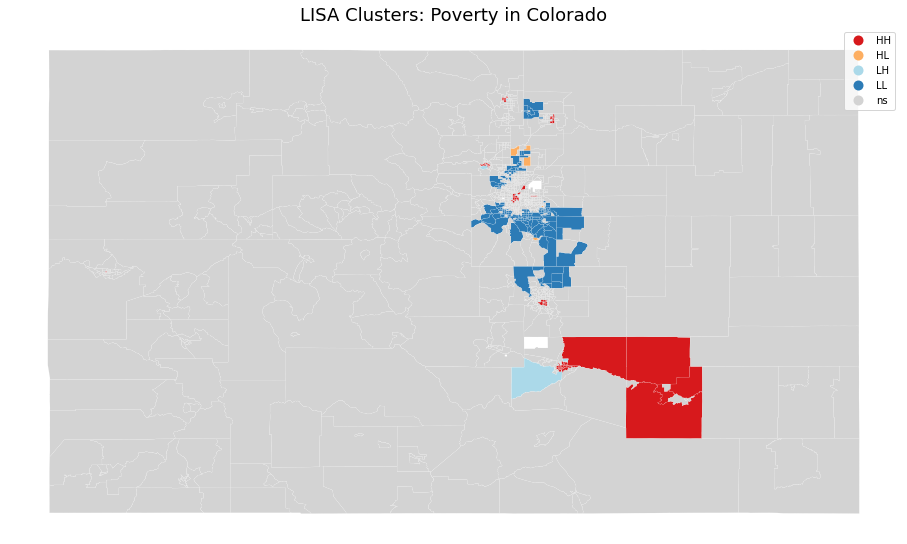

In [33]:
fig, ax = lisa_cluster(lisa_pov, CO_3, p=.01)

ax.set_title("LISA Clusters: Poverty in Colorado", size=18)
fig.set_size_inches(16, 12)
plt.show()

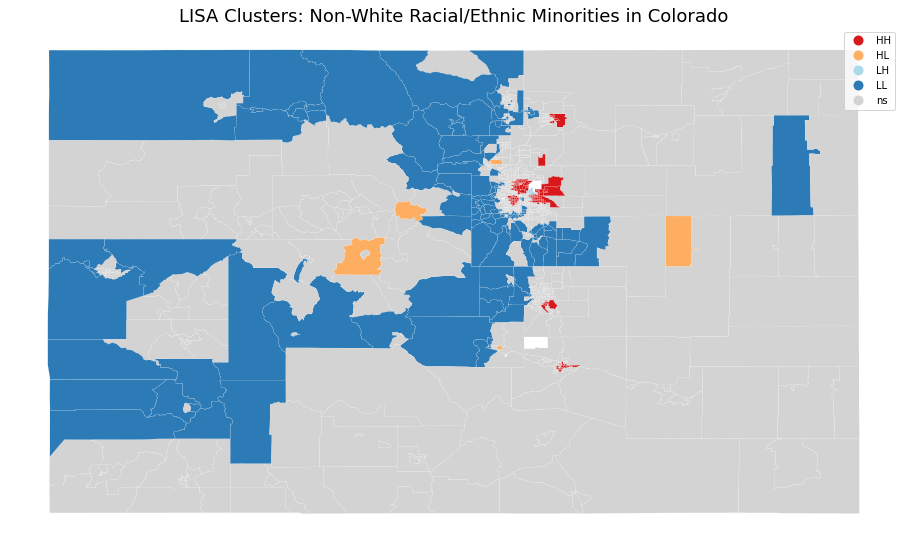

In [34]:
fig, ax = lisa_cluster(lisa_min, CO_3, p=.01)

ax.set_title("LISA Clusters: Non-White Racial/Ethnic Minorities in Colorado", size=18)
fig.set_size_inches(16, 12)
plt.show()

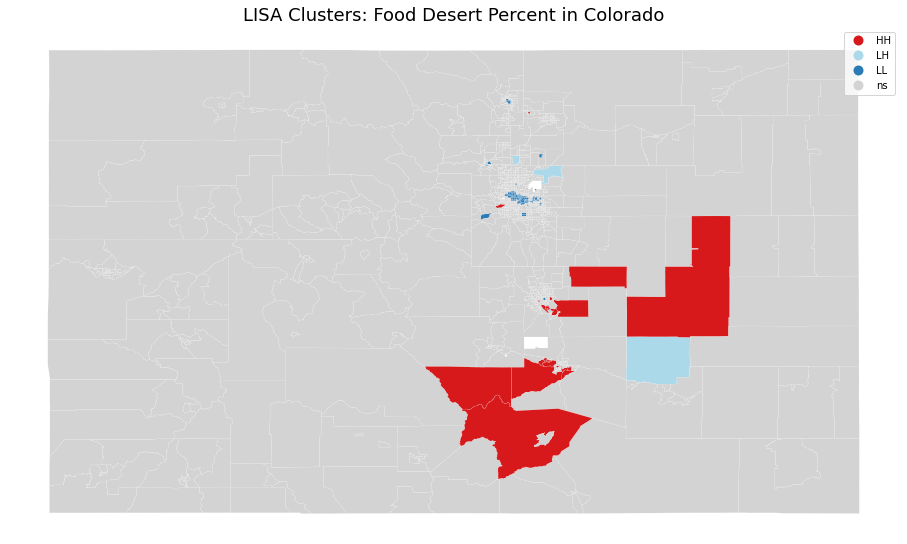

In [44]:
fig, ax = lisa_cluster(lisa_fd, CO_3, p=.01)

ax.set_title("LISA Clusters: Food Desert Percent in Colorado", size=18)
fig.set_size_inches(16, 12)
plt.show()

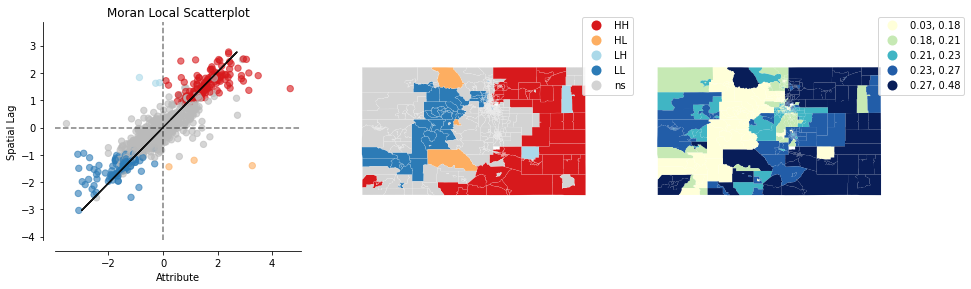

In [ ]:
plot_local_autocorrelation(lisa_obs,CO_3,'obesity_percent', p=.01);

In [35]:
!pip install mapclassify
!apt-get install libproj-dev proj-data proj-bin
!apt-get install libgeos-dev
!pip install geoplot
!pip install stargazer

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libproj-dev is already the newest version (4.9.3-2).
libproj-dev set to manually installed.
proj-data is already the newest version (4.9.3-2).
proj-data set to manually installed.
The following packages were automatically installed and are no longer required:
  libnvidia-common-460 nsight-compute-2020.2.0
Use 'apt autoremove' to remove them.
The following NEW packages will be installed:
  proj-bin
0 upgraded, 1 newly installed, 0 to remove and 42 not upgraded.
Need to get 32.3 kB of archives.
After this operation, 110 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 proj-bin amd64 4.9.3-2 [32.3 kB]
Fetched 32.3 kB in 0s (152 kB/s)
Selecting previously unselected package proj-bin.
(Reading database ... 155292 files and directories currently installed.)
Preparing to unpack .../proj-bin_4.9.3-2_amd64.deb ...
Unpacking proj-bin (4.9.3-2) ...


In [36]:
# Model 1 Approach:
# Run OLS models in areas only with and only without food deserts & compare

y = 'obesity percent'
x = ['median age', 'sex ratio', 'unmoved percent', 'poverty percent', 'minority percent', 'bachelors degree percent']

# for stats models api
xcoef = ['constant', 'median age', 'sex ratio', 'unmoved percent', 'poverty percent', 'minority percent', 'bachelors degree percent']

CO_food_deserts = CO_3[CO_3['food desert exists'] == 1]
CO_non_food_deserts = CO_3[CO_3['food desert exists'] == 0]

Y_fd = CO_food_deserts[y]
X_fd = CO_food_deserts[x]

Y_nfd = CO_non_food_deserts[y]
X_nfd = CO_non_food_deserts[x]

In [37]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [48]:
CO_food_deserts[x].describe()

,median age,sex ratio,unmoved percent,poverty percent,minority percent,bachelors degree percent
count,486.000,486.000,486.000,486.000,486.000,486.000
mean,39.346,113.188,0.825,0.097,0.301,0.263
std,7.802,224.226,0.089,0.077,0.197,0.139
min,20.200,64.400,0.238,0.000,0.026,0.000
25%,33.600,92.400,0.790,0.042,0.148,0.149
50%,38.300,100.100,0.844,0.075,0.248,0.249
75%,43.975,108.300,0.883,0.131,0.409,0.366
max,66.300,4987.200,0.996,0.383,0.917,0.640


In [52]:
CO_food_deserts[x].corr()

,median age,sex ratio,unmoved percent,poverty percent,minority percent,bachelors degree percent
median age,1.000,-0.032,0.504,-0.249,-0.563,0.449
sex ratio,-0.032,1.000,0.045,-0.057,0.063,-0.106
unmoved percent,0.504,0.045,1.000,-0.229,-0.168,0.117
poverty percent,-0.249,-0.057,-0.229,1.000,0.528,-0.564
minority percent,-0.563,0.063,-0.168,0.528,1.000,-0.635
bachelors degree percent,0.449,-0.106,0.117,-0.564,-0.635,1.000


In [53]:
CO_non_food_deserts[x].describe()

,median age,sex ratio,unmoved percent,poverty percent,minority percent,bachelors degree percent
count,753.000,753.000,753.000,753.000,753.000,753.000
mean,38.225,102.962,0.805,0.113,0.316,0.291
std,7.219,24.448,0.103,0.088,0.201,0.152
min,14.600,49.800,0.155,0.000,0.028,0.003
25%,33.500,91.700,0.756,0.053,0.163,0.165
50%,37.600,100.900,0.829,0.090,0.254,0.286
75%,42.600,109.500,0.877,0.145,0.425,0.390
max,75.300,568.400,0.958,0.768,0.934,0.751


In [54]:
CO_non_food_deserts[x].corr()

,median age,sex ratio,unmoved percent,poverty percent,minority percent,bachelors degree percent
median age,1.000,-0.087,0.560,-0.439,-0.500,0.328
sex ratio,-0.087,1.000,-0.041,-0.004,0.047,-0.116
unmoved percent,0.560,-0.041,1.000,-0.333,-0.070,-0.001
poverty percent,-0.439,-0.004,-0.333,1.000,0.439,-0.399
minority percent,-0.500,0.047,-0.070,0.439,1.000,-0.627
bachelors degree percent,0.328,-0.116,-0.001,-0.399,-0.627,1.000


In [55]:
with open('fd_stats.tex', 'w') as tf:
  tf.write(CO_food_deserts[x].describe().to_latex())

with open('fd_corr.tex', 'w') as tf:
  tf.write(CO_food_deserts[x].corr().to_latex())

with open('nfd_stats.tex', 'w') as tf:
  tf.write(CO_non_food_deserts[x].describe().to_latex())

with open('nfd_corr.tex', 'w') as tf:
  tf.write(CO_non_food_deserts[x].corr().to_latex())

In [38]:
import statsmodels.api as sm

X_nfd = sm.add_constant(X_nfd)
lr = sm.OLS(Y_nfd, X_nfd).fit()
lr.summary(xname=xcoef)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        obesity percent   R-squared:                       0.409
Model:                            OLS   Adj. R-squared:                  0.404
Method:                 Least Squares   F-statistic:                     86.03
Date:                Mon, 09 May 2022   Prob (F-statistic):           7.74e-82
Time:                        19:16:42   Log-Likelihood:                 1310.2
No. Observations:                 753   AIC:                            -2606.
Df Residuals:                     746   BIC:                            -2574.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
constant                     0.1899      0.019     10.234      0.000       0.153       0.226
median age                   0.0015      0.000      4.694      0.000       0.001       0.002
sex ratio                   -0.0001   6.45e-05     -1.582      0.114      -0.000    2.46e-05
unmoved percent              0.0418      0.020      2.128      0.034       0.003       0.080
poverty percent             -0.0592      0.022     -2.744      0.006      -0.102      -0.017
minority percent             0.0416      0.011      3.690      0.000       0.019       0.064
bachelors degree percent    -0.2145      0.014    -15.837      0.000      -0.241      -0.188
==============================================================================
Omnibus:                       39.173   Durbin-Watson:                   0.866
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              113.637
Skew:                          -0.168   Prob(JB):                     2.11e-25
Kurtosis:                       4.873   Cond. No.                     1.96e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.96e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [39]:
X_fd = sm.add_constant(X_fd)
lr_fd = sm.OLS(Y_fd, X_fd).fit()
lr_fd.summary(xname=xcoef)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        obesity percent   R-squared:                       0.401
Model:                            OLS   Adj. R-squared:                  0.394
Method:                 Least Squares   F-statistic:                     53.51
Date:                Mon, 09 May 2022   Prob (F-statistic):           2.09e-50
Time:                        19:16:45   Log-Likelihood:                 857.06
No. Observations:                 486   AIC:                            -1700.
Df Residuals:                     479   BIC:                            -1671.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
constant                     0.1629      0.021      7.693      0.000       0.121       0.205
median age                   0.0022      0.000      6.156      0.000       0.001       0.003
sex ratio                -2.033e-05   8.61e-06     -2.361      0.019   -3.72e-05   -3.41e-06
unmoved percent              0.0247      0.026      0.947      0.344      -0.027       0.076
poverty percent             -0.0201      0.033     -0.617      0.538      -0.084       0.044
minority percent             0.0751      0.014      5.185      0.000       0.047       0.104
bachelors degree percent    -0.2137      0.020    -10.897      0.000      -0.252      -0.175
==============================================================================
Omnibus:                       13.483   Durbin-Watson:                   0.981
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               25.870
Skew:                          -0.088   Prob(JB):                     2.41e-06
Kurtosis:                       4.117   Cond. No.                     5.01e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.01e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [58]:
from stargazer.stargazer import Stargazer

sg1 = Stargazer([lr, lr_fd])

sg1.render_latex()

'\\begin{table}[!htbp] \\centering\n\\begin{tabular}{@{\\extracolsep{5pt}}lcc}\n\\\\[-1.8ex]\\hline\n\\hline \\\\[-1.8ex]\n& \\multicolumn{2}{c}{\\textit{Dependent variable:}} \\\n\\cr \\cline{2-3}\n\\\\[-1.8ex] & (1) & (2) \\\\\n\\hline \\\\[-1.8ex]\n bachelors degree percent & -0.215$^{***}$ & -0.214$^{***}$ \\\\\n  & (0.014) & (0.020) \\\\\n const & 0.190$^{***}$ & 0.163$^{***}$ \\\\\n  & (0.019) & (0.021) \\\\\n median age & 0.001$^{***}$ & 0.002$^{***}$ \\\\\n  & (0.000) & (0.000) \\\\\n minority percent & 0.042$^{***}$ & 0.075$^{***}$ \\\\\n  & (0.011) & (0.014) \\\\\n poverty percent & -0.059$^{***}$ & -0.020$^{}$ \\\\\n  & (0.022) & (0.033) \\\\\n sex ratio & -0.000$^{}$ & -0.000$^{**}$ \\\\\n  & (0.000) & (0.000) \\\\\n unmoved percent & 0.042$^{**}$ & 0.025$^{}$ \\\\\n  & (0.020) & (0.026) \\\\\n\\hline \\\\[-1.8ex]\n Observations & 753 & 486 \\\\\n $R^2$ & 0.409 & 0.401 \\\\\n Adjusted $R^2$ & 0.404 & 0.394 \\\\\n Residual Std. Error & 0.043(df = 746) & 0.042(df = 479)  \\\\

In [59]:
with open('method1.tex', 'w') as tf:
  tf.write(sg1.render_latex())

In [40]:
# Method 2 - Interactions
from sklearn.preprocessing import PolynomialFeatures

interaction = PolynomialFeatures(degree=2, include_bias=False, interaction_only=True)

x2 = ['median age', 'sex ratio', 'unmoved percent', 'poverty percent', 'minority percent', 'bachelors degree percent', 'food desert percent']

Y = CO_3[y]
X = CO_3[x2]

X_inter = pd.DataFrame(interaction.fit_transform(X), columns=interaction.get_feature_names(input_features=['median age', 'sex ratio', 'unmoved percent', 'poverty percent', 'minority percent', 'bachelors degree percent', 'food desert percent']))

X_inter.columns

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Index(['median age', 'sex ratio', 'unmoved percent', 'poverty percent',
       'minority percent', 'bachelors degree percent', 'food desert percent',
       'median age sex ratio', 'median age unmoved percent',
       'median age poverty percent', 'median age minority percent',
       'median age bachelors degree percent', 'median age food desert percent',
       'sex ratio unmoved percent', 'sex ratio poverty percent',
       'sex ratio minority percent', 'sex ratio bachelors degree percent',
       'sex ratio food desert percent', 'unmoved percent poverty percent',
       'unmoved percent minority percent',
       'unmoved percent bachelors degree percent',
       'unmoved percent food desert percent',
       'poverty percent minority percent',
       'poverty percent bachelors degree percent',
       'poverty percent food desert percent',
       'minority percent bachelors degree percent',
       'minority percent food desert percent',
       'bachelors degree percent food desert pe

In [41]:
X_inter_2 = X_inter[['median age', 'sex ratio', 'unmoved percent', 'poverty percent', 'minority percent', 'bachelors degree percent', 'food desert percent', 'bachelors degree percent food desert percent']]

X_inter_3 = X_inter[['median age', 'sex ratio', 'unmoved percent', 'poverty percent', 'minority percent', 'bachelors degree percent', 'food desert percent', 'poverty percent food desert percent']]

X_inter_4 = X_inter[['median age', 'sex ratio', 'unmoved percent', 'poverty percent', 'minority percent', 'bachelors degree percent', 'food desert percent', 'minority percent food desert percent']]

X_inter_5 = X_inter[['median age', 'sex ratio', 'unmoved percent', 'poverty percent', 'minority percent', 'bachelors degree percent', 'food desert percent', 'bachelors degree percent food desert percent', 'poverty percent food desert percent', 'minority percent food desert percent']]


In [42]:
xi1 = ['median age', 'sex ratio', 'unmoved percent', 'poverty percent', 'minority percent', 'bachelors degree percent', 'food desert percent', 'bachelors degree percent food desert percent']

Xi1 = X_inter_2[xi1]

xi2 = ['median age', 'sex ratio', 'unmoved percent', 'poverty percent', 'minority percent', 'bachelors degree percent', 'food desert percent', 'poverty percent food desert percent']

Xi2 = X_inter_3[xi2]

xi3 = ['median age', 'sex ratio', 'unmoved percent', 'poverty percent', 'minority percent', 'bachelors degree percent', 'food desert percent', 'minority percent food desert percent']

Xi3 = X_inter_4[xi3]

xi4 = ['median age', 'sex ratio', 'unmoved percent', 'poverty percent', 'minority percent', 'bachelors degree percent', 'food desert percent', 'bachelors degree percent food desert percent', 'poverty percent food desert percent', 'minority percent food desert percent']

Xi4 = X_inter_5[xi4]

In [43]:
X_c = sm.add_constant(X)
lr_base = sm.OLS(Y, X_c).fit()

#xcoef_lr_base = ['constant', 'median age', 'sex ratio', 'unmoved percent', 'poverty percent', 'minority percent', 'bachelors degree percent', 'food desert percent']

lr_base.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        obesity percent   R-squared:                       0.420
Model:                            OLS   Adj. R-squared:                  0.417
Method:                 Least Squares   F-statistic:                     127.3
Date:                Mon, 09 May 2022   Prob (F-statistic):          9.09e-141
Time:                        19:16:52   Log-Likelihood:                 2165.9
No. Observations:                1239   AIC:                            -4316.
Df Residuals:                    1231   BIC:                            -4275.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.1684      0.013     12.985      0.000       0.143       0.194
median age                   0.0018      0.000      7.633      0.000       0.001       0.002
sex ratio                -2.342e-05   8.55e-06     -2.740      0.006   -4.02e-05   -6.65e-06
unmoved percent              0.0355      0.016      2.274      0.023       0.005       0.066
poverty percent             -0.0412      0.018     -2.347      0.019      -0.076      -0.007
minority percent             0.0549      0.009      6.226      0.000       0.038       0.072
bachelors degree percent    -0.2114      0.011    -19.345      0.000      -0.233      -0.190
food desert percent          0.0183      0.004      4.792      0.000       0.011       0.026
==============================================================================
Omnibus:                       54.876   Durbin-Watson:                   0.775
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              149.077
Skew:                          -0.164   Prob(JB):                     4.25e-33
Kurtosis:                       4.667   Cond. No.                     3.19e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.19e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [44]:
Yi = Y.reset_index()['obesity percent']

In [45]:
Xi1_c = sm.add_constant(Xi1)
lr_i1 = sm.OLS(Yi, Xi1_c).fit()

#xcoef_lr_int = ['constant', 'median_age', 'sex_ratio', 'unmoved_percent', 'poverty_percent', 'minority_percent', 'bachelors_degree_percent', 'food_desert_percent', 'bd_fd_percent']

lr_i1.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        obesity percent   R-squared:                       0.420
Model:                            OLS   Adj. R-squared:                  0.416
Method:                 Least Squares   F-statistic:                     111.3
Date:                Mon, 09 May 2022   Prob (F-statistic):          9.47e-140
Time:                        19:16:56   Log-Likelihood:                 2166.1
No. Observations:                1239   AIC:                            -4314.
Df Residuals:                    1230   BIC:                            -4268.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                            0.1676      0.013     12.832      0.000       0.142       0.193
median age                                       0.0018      0.000      7.643      0.000       0.001       0.002
sex ratio                                    -2.401e-05   8.63e-06     -2.780      0.006   -4.09e-05   -7.07e-06
unmoved percent                                  0.0355      0.016      2.277      0.023       0.005       0.066
poverty percent                                 -0.0417      0.018     -2.373      0.018      -0.076      -0.007
minority percent                                 0.0549      0.009      6.223      0.000       0.038       0.072
bachelors degree percent                        -0.2090      0.012    -17.443      0.000      -0.233      -0.186
food desert percent                              0.0216      0.008      2.759      0.006       0.006       0.037
bachelors degree percent food desert percent    -0.0127      0.026     -0.485      0.628      -0.064       0.039
==============================================================================
Omnibus:                       55.246   Durbin-Watson:                   0.775
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              150.175
Skew:                          -0.167   Prob(JB):                     2.45e-33
Kurtosis:                       4.673   Cond. No.                     4.12e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.12e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [46]:
Xi2_c = sm.add_constant(Xi2)
lr_i2 = sm.OLS(Yi, Xi2_c).fit()

#xcoef_lr_int = ['constant', 'median_age', 'sex_ratio', 'unmoved_percent', 'poverty_percent', 'minority_percent', 'bachelors_degree_percent', 'food_desert_percent', 'bd_fd_percent']

lr_i2.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        obesity percent   R-squared:                       0.423
Model:                            OLS   Adj. R-squared:                  0.420
Method:                 Least Squares   F-statistic:                     112.9
Date:                Mon, 09 May 2022   Prob (F-statistic):          2.85e-141
Time:                        19:16:58   Log-Likelihood:                 2169.6
No. Observations:                1239   AIC:                            -4321.
Df Residuals:                    1230   BIC:                            -4275.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                   0.1729      0.013     13.258      0.000       0.147       0.199
median age                              0.0017      0.000      7.208      0.000       0.001       0.002
sex ratio                           -2.119e-05   8.56e-06     -2.474      0.013    -3.8e-05   -4.39e-06
unmoved percent                         0.0373      0.016      2.394      0.017       0.007       0.068
poverty percent                        -0.0643      0.019     -3.301      0.001      -0.102      -0.026
minority percent                        0.0523      0.009      5.913      0.000       0.035       0.070
bachelors degree percent               -0.2098      0.011    -19.222      0.000      -0.231      -0.188
food desert percent                     0.0062      0.006      1.065      0.287      -0.005       0.018
poverty percent food desert percent     0.1202      0.044      2.704      0.007       0.033       0.207
==============================================================================
Omnibus:                       56.604   Durbin-Watson:                   0.773
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.841
Skew:                          -0.185   Prob(JB):                     1.07e-33
Kurtosis:                       4.675   Cond. No.                     6.83e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.83e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [47]:
Xi3_c = sm.add_constant(Xi3)
lr_i3 = sm.OLS(Yi, Xi3_c).fit()

#xcoef_lr_int = ['constant', 'median_age', 'sex_ratio', 'unmoved_percent', 'poverty_percent', 'minority_percent', 'bachelors_degree_percent', 'food_desert_percent', 'bd_fd_percent']

lr_i3.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        obesity percent   R-squared:                       0.422
Model:                            OLS   Adj. R-squared:                  0.418
Method:                 Least Squares   F-statistic:                     112.2
Date:                Mon, 09 May 2022   Prob (F-statistic):          1.44e-140
Time:                        19:16:59   Log-Likelihood:                 2168.0
No. Observations:                1239   AIC:                            -4318.
Df Residuals:                    1230   BIC:                            -4272.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                    0.1713      0.013     13.144      0.000       0.146       0.197
median age                               0.0018      0.000      7.697      0.000       0.001       0.002
sex ratio                            -2.476e-05   8.56e-06     -2.892      0.004   -4.16e-05   -7.96e-06
unmoved percent                          0.0354      0.016      2.273      0.023       0.005       0.066
poverty percent                         -0.0428      0.018     -2.441      0.015      -0.077      -0.008
minority percent                         0.0465      0.010      4.766      0.000       0.027       0.066
bachelors degree percent                -0.2125      0.011    -19.447      0.000      -0.234      -0.191
food desert percent                      0.0070      0.007      1.029      0.304      -0.006       0.020
minority percent food desert percent     0.0356      0.018      2.010      0.045       0.001       0.070
==============================================================================
Omnibus:                       56.983   Durbin-Watson:                   0.772
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.373
Skew:                          -0.193   Prob(JB):                     1.35e-33
Kurtosis:                       4.668   Cond. No.                     3.22e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.22e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [48]:
Xi4_c = sm.add_constant(Xi4)
lr_i4 = sm.OLS(Yi, Xi4_c).fit()

#xcoef_lr_int = ['constant', 'median_age', 'sex_ratio', 'unmoved_percent', 'poverty_percent', 'minority_percent', 'bachelors_degree_percent', 'food_desert_percent', 'bd_fd_percent']

lr_i4.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        obesity percent   R-squared:                       0.425
Model:                            OLS   Adj. R-squared:                  0.420
Method:                 Least Squares   F-statistic:                     90.64
Date:                Mon, 09 May 2022   Prob (F-statistic):          7.70e-140
Time:                        19:17:01   Log-Likelihood:                 2171.1
No. Observations:                1239   AIC:                            -4320.
Df Residuals:                    1228   BIC:                            -4264.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                            0.1791      0.014     13.223      0.000       0.153       0.206
median age                                       0.0017      0.000      7.054      0.000       0.001       0.002
sex ratio                                    -1.947e-05   8.81e-06     -2.210      0.027   -3.68e-05   -2.19e-06
unmoved percent                                  0.0371      0.016      2.382      0.017       0.007       0.068
poverty percent                                 -0.0649      0.020     -3.205      0.001      -0.105      -0.025
minority percent                                 0.0452      0.010      4.365      0.000       0.025       0.065
bachelors degree percent                        -0.2213      0.013    -17.194      0.000      -0.247      -0.196
food desert percent                             -0.0190      0.016     -1.189      0.235      -0.050       0.012
bachelors degree percent food desert percent     0.0568      0.035      1.620      0.105      -0.012       0.126
poverty percent food desert percent              0.1301      0.057      2.264      0.024       0.017       0.243
minority percent food desert percent             0.0294      0.025      1.198      0.231      -0.019       0.078
==============================================================================
Omnibus:                       57.126   Durbin-Watson:                   0.768
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              150.488
Skew:                          -0.198   Prob(JB):                     2.10e-33
Kurtosis:                       4.661   Cond. No.                     9.07e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.07e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [49]:
from statsmodels.stats.anova import anova_lm

# w = libpysal.weights.Queen.from_dataframe(CO_3)
# w
anovaResults1 = anova_lm(lr_base, lr_i1)
print(anovaResults1)

   df_resid   ssr  df_diff  ss_diff     F  Pr(>F)
0  1231.000 2.199    0.000      NaN   NaN     NaN
1  1230.000 2.198    1.000    0.000 0.235   0.628


In [50]:
anovaResults2 = anova_lm(lr_base, lr_i2)
print(anovaResults2)

   df_resid   ssr  df_diff  ss_diff     F  Pr(>F)
0  1231.000 2.199    0.000      NaN   NaN     NaN
1  1230.000 2.186    1.000    0.013 7.312   0.007


In [51]:
anovaResults3 = anova_lm(lr_base, lr_i3)
print(anovaResults3)

   df_resid   ssr  df_diff  ss_diff     F  Pr(>F)
0  1231.000 2.199    0.000      NaN   NaN     NaN
1  1230.000 2.192    1.000    0.007 4.039   0.045


In [52]:
anovaResults4 = anova_lm(lr_base, lr_i4)
print(anovaResults4)

   df_resid   ssr  df_diff  ss_diff     F  Pr(>F)
0  1231.000 2.199    0.000      NaN   NaN     NaN
1  1228.000 2.181    3.000    0.018 3.403   0.017


In [53]:
# Method 3 - spatial models

import spreg

y = 'obesity percent'
x = ['median age', 'sex ratio', 'unmoved percent', 'poverty percent', 'minority percent', 'bachelors degree percent', 'food desert percent']

Y = CO_3[y].values.reshape(len(CO_3),1) #add dimension for spreg OLS DV
X = CO_3[x].values

w.n

1239

In [54]:
ols=spreg.OLS(Y, X, w=w, \
                          name_y="Obesity", name_x=['median age', 'sex ratio', 'unmoved percent', 'poverty percent', 'minority percent', 'bachelors degree percent', 'food desert percent'], name_w="queen's continuity",\
                          nonspat_diag=True, #print stats
                          spat_diag=True,  #print Lagrange multiplier tests 
                          moran=True)  # compute Moran’s I on the residuals
print(ols.summary)

REGRESSION
----------
SUMMARY OF OUTPUT: ORDINARY LEAST SQUARES
-----------------------------------------
Data set            :     unknown
Weights matrix      :queen's continuity
Dependent Variable  :     Obesity                Number of Observations:        1239
Mean dependent var  :      0.2209                Number of Variables   :           8
S.D. dependent var  :      0.0553                Degrees of Freedom    :        1231
R-squared           :      0.4199
Adjusted R-squared  :      0.4166
Sum squared residual:       2.199                F-statistic           :    127.2835
Sigma-square        :       0.002                Prob(F-statistic)     :  9.095e-141
S.E. of regression  :       0.042                Log likelihood        :    2165.934
Sigma-square ML     :       0.002                Akaike info criterion :   -4315.868
S.E of regression ML:      0.0421                Schwarz criterion     :   -4274.892

-----------------------------------------------------------------------

In [75]:
serror = spreg.ML_Error(Y, X, w=w,  name_y="Obesity", name_x=['median age', 'sex ratio', 'unmoved percent', 'poverty percent', 'minority percent', 'bachelors degree percent', 'food desert percent'], name_w="queen's continuity")
print(serror.summary)

/usr/local/lib/python3.7/dist-packages/scipy/optimize/_minimize.py:770: RuntimeWarning: Method 'bounded' does not support relative tolerance in x; defaulting to absolute tolerance.
  "defaulting to absolute tolerance.", RuntimeWarning)


REGRESSION
----------
SUMMARY OF OUTPUT: MAXIMUM LIKELIHOOD SPATIAL ERROR (METHOD = FULL)
-------------------------------------------------------------------
Data set            :     unknown
Weights matrix      :queen's continuity
Dependent Variable  :     Obesity                Number of Observations:        1239
Mean dependent var  :      0.2209                Number of Variables   :           8
S.D. dependent var  :      0.0553                Degrees of Freedom    :        1231
Pseudo R-squared    :      0.3485
Sigma-square ML     :       0.001                Log likelihood        :    2748.320
S.E of regression   :       0.024                Akaike info criterion :   -5480.641
                                                 Schwarz criterion     :   -5439.664

------------------------------------------------------------------------------------
            Variable     Coefficient       Std.Error     z-Statistic     Probability
-----------------------------------------------------

In [76]:
slag = spreg.ML_Lag(Y, X, w=w,  name_y="Obesity", name_x=['median age', 'sex ratio', 'unmoved percent', 'poverty percent', 'minority percent', 'bachelors degree percent', 'food desert percent'], name_w="queen's continuity")
print(slag.summary)

/usr/local/lib/python3.7/dist-packages/scipy/optimize/_minimize.py:770: RuntimeWarning: Method 'bounded' does not support relative tolerance in x; defaulting to absolute tolerance.
  "defaulting to absolute tolerance.", RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


REGRESSION
----------
SUMMARY OF OUTPUT: MAXIMUM LIKELIHOOD SPATIAL LAG (METHOD = FULL)
-----------------------------------------------------------------
Data set            :     unknown
Weights matrix      :queen's continuity
Dependent Variable  :     Obesity                Number of Observations:        1239
Mean dependent var  :      0.2209                Number of Variables   :           9
S.D. dependent var  :      0.0553                Degrees of Freedom    :        1230
Pseudo R-squared    :      0.8096
Spatial Pseudo R-squared:  0.4436
Sigma-square ML     :       0.001                Log likelihood        :    2747.144
S.E of regression   :       0.024                Akaike info criterion :   -5476.287
                                                 Schwarz criterion     :   -5430.189

------------------------------------------------------------------------------------
            Variable     Coefficient       Std.Error     z-Statistic     Probability
-----------------------